In [37]:
using Base.Threads
using Distributions
using Memoization
using QuadGK
using Random
using StatsBase
using StatsPlots

In [38]:
function sim(f, g, dist, n; L=10^6)
    X1 = rand(dist, n)
    F = Vector{typeof(f(X1, dist))}(undef, L)
    G = Vector{typeof(g(X1, dist))}(undef, L)
    tmp = [Vector{eltype(dist)}(undef, n) for _ in 1:nthreads()]
    @threads for i in 1:L
        X = rand!(dist, tmp[threadid()])
        F[i] = f(X, dist)
        G[i] = g(X, dist)
    end
    (; F, G)
end

sim (generic function with 1 method)

In [39]:
function pvalue_tdist(x̄, s², n, μ)
    t = (x̄ - μ)/√(s²/n)
    2ccdf(TDist(n-1), abs(t))
end
pvalue_tdist(X, μ) = pvalue_tdist(mean(X), var(X), length(X), μ)

pvalue_tdist (generic function with 2 methods)

In [40]:
@memoize function logmean(dist; a=-1e2, b=1e2)
    quadgk(x -> x * exp(logpdf(dist, exp(x)) + x), a, b)[1]
end

@show logmean(LogNormal(2, 3))
@show logmean(Gamma(2, 3));

logmean(LogNormal(2, 3)) = 2.0
logmean(Gamma(2, 3)) = 1.521396623766577


In [41]:
quadgk(x -> x * exp(logpdf(Gamma(2,3), exp(x)) + x), -10, 10)

(1.521396624968904, 1.725963971070855e-9)

logmean(dist) = -0.31759071136536954
ecdf_F(0.05) = 0.049721
ecdf_G(0.05) = 0.049721


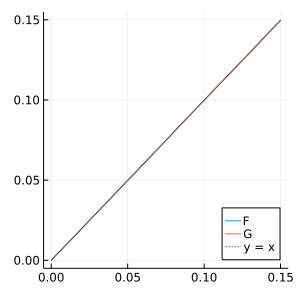

In [42]:
dist = Normal()
n = 20
f(X, dist) = pvalue_tdist(X, mean(dist))
g(X, dist) = pvalue_tdist(log.(X), logmean(dist))
(; F, G) = sim(f, f, dist, n)
@show logmean(dist)

ecdf_F = ecdf(F)
ecdf_G = ecdf(G)
@show ecdf_F(0.05)
@show ecdf_G(0.05)
plot(; legend=:bottomright)
plot!(x -> ecdf_F(x), 0, 0.15; label="F")
plot!(x -> ecdf_G(x), 0, 0.15; label="G")
plot!(x -> x, 0, 0.15; label="y = x", ls=:dot, c=:black)
plot!(; xlim=(-0.005, 0.155), ylim=(-0.005, 0.155))
plot!(; size=(300, 300))

logmean(dist) = 0.0
ecdf_F(0.05) = 0.107412
ecdf_G(0.05) = 0.049758


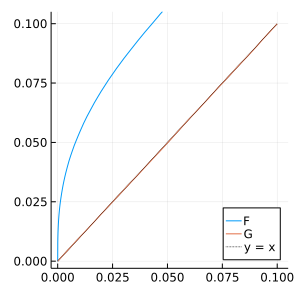

In [56]:
dist = LogNormal()
n = 40
f(X, dist) = pvalue_tdist(X, mean(dist))
g(X, dist) = pvalue_tdist(log.(X), logmean(dist))
(; F, G) = sim(f, g, dist, n)
@show logmean(dist)

ecdf_F = ecdf(F)
ecdf_G = ecdf(G)
@show ecdf_F(0.05)
@show ecdf_G(0.05)
plot(; legend=:bottomright)
plot!(x -> ecdf_F(x), 0, 0.1; label="F")
plot!(x -> ecdf_G(x), 0, 0.1; label="G")
plot!(x -> x, 0, 0.1; label="y = x", ls=:dot, c=:black)
plot!(; xlim=(-0.003, 0.105), ylim=(-0.003, 0.105))
plot!(; size=(300, 300))

ecdf_F(0.05) = 0.066599
ecdf_G(0.05) = 0.054867


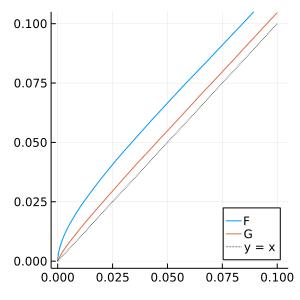

In [59]:
dist = Gamma(2, 3)
n = 20
f(X, dist) = pvalue_tdist(X, mean(dist))
g(X, dist) = pvalue_tdist(log.(X), logmean(dist))
(; F, G) = sim(f, g, dist, n)

ecdf_F = ecdf(F)
ecdf_G = ecdf(G)
@show ecdf_F(0.05)
@show ecdf_G(0.05)
plot(; legend=:bottomright)
plot!(x -> ecdf_F(x), 0, 0.1; label="F")
plot!(x -> ecdf_G(x), 0, 0.1; label="G")
plot!(x -> x, 0, 0.1; label="y = x", ls=:dot, c=:black)
plot!(; xlim=(-0.003, 0.105), ylim=(-0.003, 0.105))
plot!(; size=(300, 300))